# **HW1_1 - Deep v Shallow**

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import math
from torch.utils.data import DataLoader, TensorDataset

**Simulate a function and fit three DNNs**

In [ ]:
## Define three DNN

## Model 1
class Model_1(nn.Module):
    def __init__(self):
        super(Model_1, self).__init__()
        self.dense1 = nn.Linear(1, 5)
        self.dense2 = nn.Linear(5, 10)
        self.dense3 = nn.Linear(10, 10)
        self.dense4 = nn.Linear(10, 10)
        self.dense5 = nn.Linear(10, 10)
        self.dense6 = nn.Linear(10, 10)
        self.dense7 = nn.Linear(10, 5)
        self.dense8 = nn.Linear(5, 1)

    def forward(self, x):
        x = F.relu(self.dense1(x))
        x = F.relu(self.dense2(x))
        x = F.relu(self.dense3(x))
        x = F.relu(self.dense4(x))
        x = F.relu(self.dense5(x))
        x = F.relu(self.dense6(x))
        x = F.relu(self.dense7(x))
        x = self.dense8(x)
        return x
model_1 = Model_1()


##Model 2
class Model_2(nn.Module):
    def __init__(self):
        super(Model_2, self).__init__()
        self.dense9 = nn.Linear(1, 10)
        self.dense10 = nn.Linear(10, 18)
        self.dense11 = nn.Linear(18, 15)
        self.dense12 = nn.Linear(15, 4)
        self.dense13 = nn.Linear(4, 1)

    def forward(self, x):
        x = F.relu(self.dense9(x))
        x = F.relu(self.dense10(x))
        x = F.relu(self.dense11(x))
        x = F.relu(self.dense12(x))
        x = self.dense13(x)
        return x
model_2 = Model_2()


###Model 3
class Model_3(nn.Module):
    def __init__(self):
        super(Model_3, self).__init__()
        self.dense13 = nn.Linear(1, 190)
        self.dense14 = nn.Linear(190, 1)

    def forward(self, x):
        x = torch.relu(self.dense13(x))
        x = self.dense14(x)
        return x
model_3 = Model_3()

In [ ]:
# Function to Train the models
def train_model(model, optimizer, criterion, X_train, y_train, epochs= 10000 , batch_size= 32):
    loss_list = []
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0
        for i in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            inputs = X_train[i:i+batch_size]
            targets = y_train[i:i+batch_size]

            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item() * inputs.size(0)

        epoch_loss /= len(X_train)
        loss_list.append(epoch_loss)
        #print(f"Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.6f}")

    return loss_list

#  **Function One (F1)**

In [ ]:
torch.manual_seed(111)

In [ ]:
# Define the function to simulate and generate data
def generate_data(num_points=350, start=0.1, end=1):
    x = torch.linspace(start, end, num_points).unsqueeze(1)
    y = torch.cos(5* np.pi * x) /(5*np.pi * x)
    print(x.shape)
    print(y.shape)
    return x, y


x, y = generate_data()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

torch.Size([350, 1])
torch.Size([350, 1])


torch.Size([350, 1])
torch.Size([350, 1])


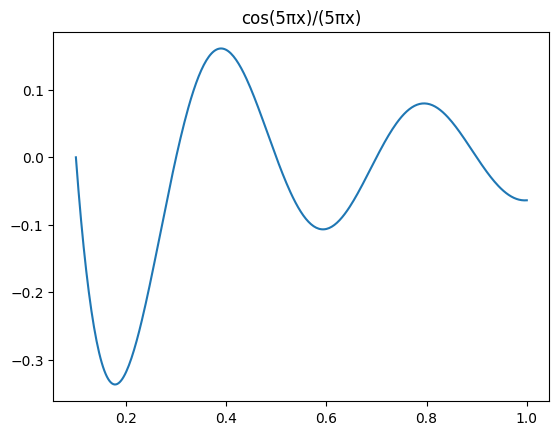

In [ ]:
##Plot the function to simulate
X , Y = generate_data()
plt.plot(X, Y)
plt.title('cos(5πx)/(5πx)')
plt.show(plt)

**Train Models for F1**

In [ ]:
###  Model 1
criterion = nn.MSELoss()
optimizer = optim.Adam(model_1.parameters(), lr = 1e-3, weight_decay = 1e-4)
model1_params = sum(p.numel() for p in model_1.parameters())
print(f'Nunber of parameter for model 1 is: {model1_params}')
loss_model1 = train_model(model_1, optimizer, criterion,X_train, y_train)


###  Model 2
criterion = nn.MSELoss()
optimizer = optim.Adam(model_2.parameters(), lr = 1e-3, weight_decay = 1e-4)
model2_params = sum(p.numel() for p in model_2.parameters())
print(f'Nunber of parameter for model 2 is: {model2_params}')
loss_model2 = train_model(model_2, optimizer, criterion,X_train, y_train)

###  Model 3
criterion = nn.MSELoss()
optimizer = optim.Adam(model_3.parameters(), lr = 1e-3, weight_decay = 1e-4)
model3_params = sum(p.numel() for p in model_3.parameters())
print(f'Nunber of parameter for model 3 is: {model3_params}')
loss_model3 = train_model(model_3, optimizer, criterion,X_train, y_train)

Nunber of parameter for model 1 is: 571
Nunber of parameter for model 2 is: 572
Nunber of parameter for model 3 is: 571


**Plot F1 Training Loss**

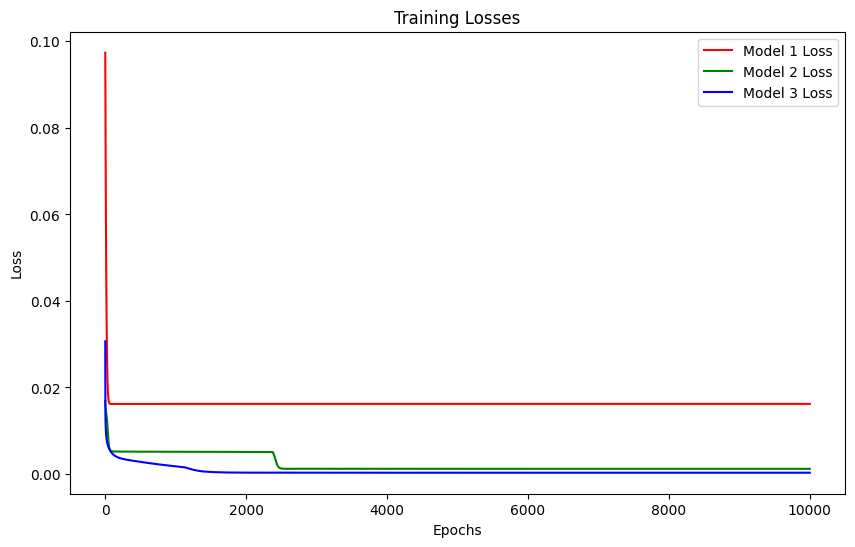

In [ ]:
# Plot the training process
plt.figure(figsize=(10, 6))
plt.plot(loss_model1, label='Model 1 Loss', color='r')
plt.plot(loss_model2, label='Model 2 Loss', color='g')
plt.plot(loss_model3, label='Model 3 Loss', color='b')
plt.title('Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Predicted Fucntion Curve and Ground Truth Function Curve (F1)**

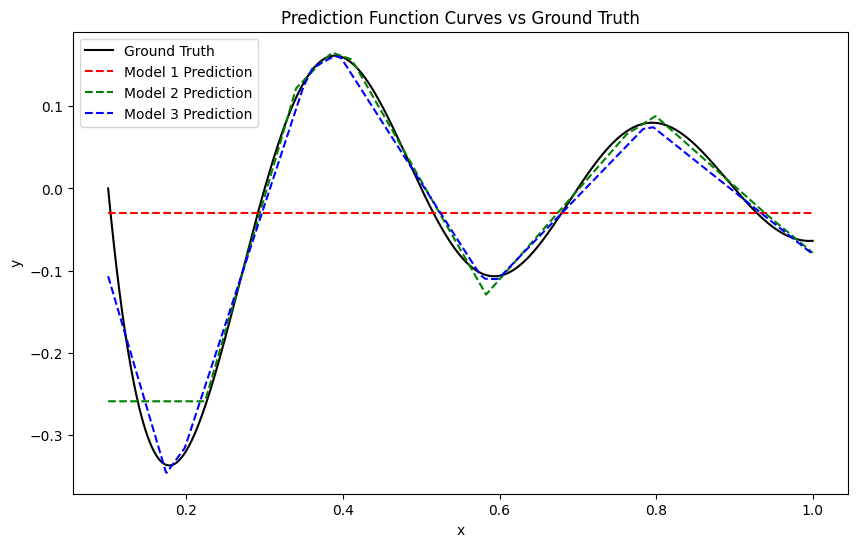

In [ ]:
# Visualize ground truth and predictions
with torch.no_grad():
    model_1.eval()
    model_2.eval()
    model_3.eval()

    x_values = torch.linspace(0.1, 1, 1000).unsqueeze(1)
    y_true = torch.cos(5 * np.pi * x_values) / (5 * np.pi * x_values)

    y_pred1 = model_1(x_values)
    y_pred2 = model_2(x_values)
    y_pred3 = model_3(x_values)

    plt.figure(figsize=(10, 6))
    plt.plot(x_values.numpy(), y_true.numpy(), label='Ground Truth', color='black')
    plt.plot(x_values.numpy(), y_pred1.numpy(), label='Model 1 Prediction', linestyle='--', color='r')
    plt.plot(x_values.numpy(), y_pred2.numpy(), label='Model 2 Prediction', linestyle='--', color='g')
    plt.plot(x_values.numpy(), y_pred3.numpy(), label='Model 3 Prediction', linestyle='--', color='b')
    plt.title('Prediction Function Curves vs Ground Truth')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# **Function Two (F2)**

torch.Size([250, 1])
torch.Size([250, 1])


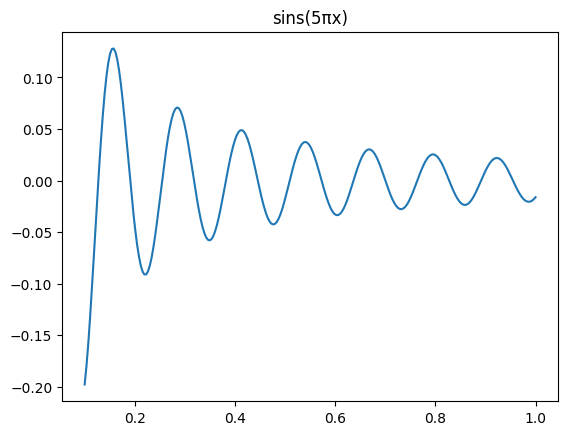

In [ ]:
# Define the function to simulate and generate data
def generate_data(num_points=250, start=0.1, end=1):
    x = torch.linspace(start, end, num_points).unsqueeze(1)
    y = torch.sinc(5*np.pi*x)
    print(x.shape)
    print(y.shape)
    return x, y



##Plot the function to simulate
X , y = generate_data()
plt.plot(X, y)
plt.title('sins(5πx)')
plt.show(plt)

In [ ]:
# Generate data to train the model
X, y = generate_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

torch.Size([250, 1])
torch.Size([250, 1])


**Train Models for F2**

In [ ]:
###  new_Model 1
model1 = Model_1()
criterion = nn.MSELoss()
optimizer = optim.Adam(model1.parameters(), lr = 1e-3, weight_decay = 1e-4)
model1_param = sum(p.numel() for p in model1.parameters())
print(f'Nunber of parameter for model 1 is: {model1_param}')
loss_1 = train_model(model1, optimizer, criterion, X_train, y_train)


###  new_Model 2
model2= Model_2()
criterion = nn.MSELoss()
optimizer = optim.Adam(model2.parameters(), lr = 1e-3, weight_decay = 1e-4)
model2_param = sum(p.numel() for p in model_2.parameters())
print(f'Nunber of parameter for model 2 is: {model2_param}')
loss_2 = train_model(model2, optimizer, criterion, X_train, y_train)

###  new_Model 3
model3 = Model_3()
criterion = nn.MSELoss()
optimizer = optim.Adam(model3.parameters(), lr = 1e-3, weight_decay = 1e-4)
model3_param = sum(p.numel() for p in model3.parameters())
print(f'Nunber of parameter for model 3 is: {model3_param}')
loss_3 = train_model(model3, optimizer, criterion, X_train, y_train)

Nunber of parameter for model 1 is: 571
Nunber of parameter for model 2 is: 572
Nunber of parameter for model 3 is: 571


**Plot F2 Training Loss**

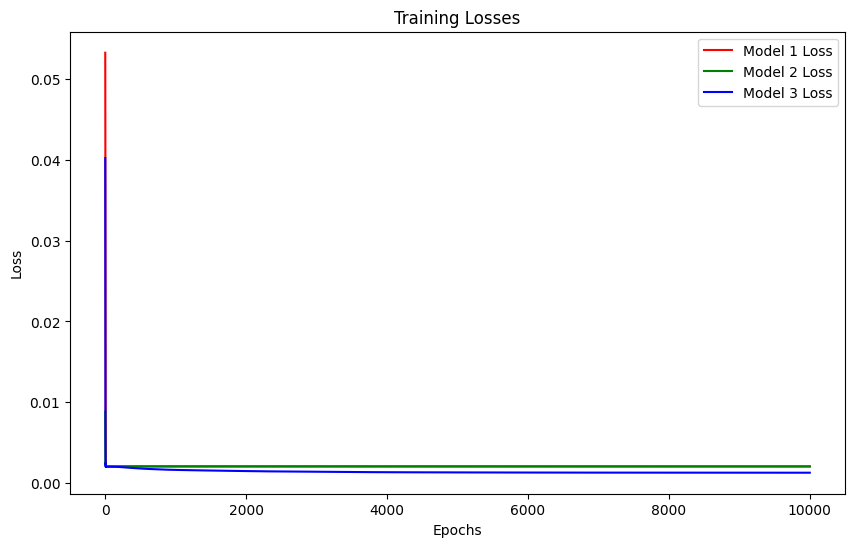

In [ ]:
# Plot the training process
plt.figure(figsize=(10, 6))
plt.plot(loss_1, label='Model 1 Loss', color='r')
plt.plot(loss_2, label='Model 2 Loss', color='g')
plt.plot(loss_3, label='Model 3 Loss', color='b')
plt.title('Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Predicted Fucntion Curve and Ground Truth Function Curve (F2)**

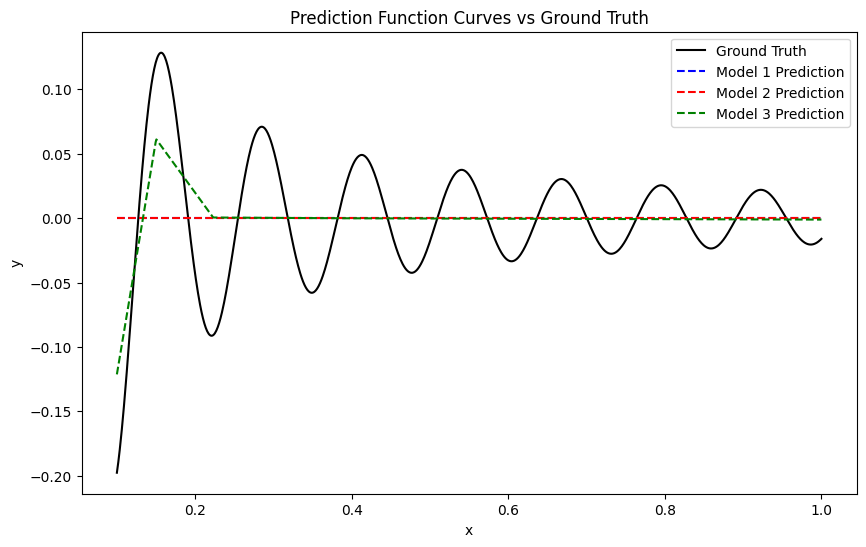

In [ ]:
# Visualize ground truth and predictions
with torch.no_grad():
    model1.eval()
    model2.eval()
    model3.eval()

    x_val = torch.linspace(0.1, 1, 1000).unsqueeze(1)
    y_gt = torch.sinc(5*np.pi*x_val)

    pred1 = model1(x_val)
    pred2 = model2(x_val)
    pred3 = model3(x_val)

    plt.figure(figsize=(10, 6))
    plt.plot(x_val.numpy(), y_gt.numpy(), label='Ground Truth', color='black')
    plt.plot(x_val.numpy(), pred1.numpy(), label='Model 1 Prediction', linestyle='--', color='blue')
    plt.plot(x_val.numpy(), pred2.numpy(), label='Model 2 Prediction', linestyle='--', color='red')
    plt.plot(x_val.numpy(), pred3.numpy(), label='Model 3 Prediction', linestyle='--', color='green')
    plt.title('Prediction Function Curves vs Ground Truth')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
